In [1]:
import json
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.cm as cm

In [2]:
# Initialize empty lists to store ids and embeddings
ids = []
embeddings = []

embedding_files = ['data/specter/output_10k.json']
# embedding_files = ['custom output/embedding_result_train.jsonl', 'custom output/embedding_result_val.jsonl', 'custom output/embedding_result_test.jsonl']

# Load embeddings from JSON file
for file in embedding_files:
    with open(file, 'r') as f:
        for line in f:
            data = json.loads(line)
            id = data['paper_id']
            # removing the R paper because it has too many citations and makes everything else in graph look tiny
            if id == '659408b243cec55de8d0a3bc51b81173007aa89b':
                continue
            embedding = np.array(data['embedding'])
            ids.append(id)
            embeddings.append(embedding)

In [3]:
# Convert lists to numpy arrays
ids = np.array(ids)
embeddings = np.array(embeddings)

In [4]:
embeddings.shape

(9921, 768)

In [5]:
embeddings[0].shape

(768,)

In [6]:
df = pd.read_csv('data/10k_sorted_v2_trimmed.csv')

In [7]:
ids[:2].tolist()

['fa72afa9b2cbc8f0d7b05d52548906610ffbb9c5',
 'a6cb366736791bcccc5c8639de5a8f9636bf87e8']

In [8]:
filtered_df = df.set_index('paperId').loc[ids].reset_index()

In [9]:
filtered_df.head(2)

,paperId,title,abstract,year,referenceCount,citationCount,influentialCitationCount,references
0,fa72afa9b2cbc8f0d7b05d52548906610ffbb9c5,Neural Machine Translation by Jointly Learning...,Neural machine translation is a recently propo...,2014,32,22147,2778,"['44d2abe2175df8153f465f6c39b68b76a0d40ab9', '..."
1,a6cb366736791bcccc5c8639de5a8f9636bf87e8,Adam: A Method for Stochastic Optimization,"We introduce Adam, an algorithm for first-orde...",2014,29,110630,18981,"['abd1c342495432171beb7ca8fd9551ef13cbd0ff', '..."


In [10]:
color_list = filtered_df['citationCount'].to_list()

In [11]:
tsne = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, n_iter=1000, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

In [12]:
embeddings_2d

array([[ 46.23664 ,  26.882277],
       [-12.969165,  31.467712],
       [ 57.64    , -33.92533 ],
       ...,
       [-52.111607, -49.163227],
       [ 14.172874, -13.018872],
       [ 14.10821 , -12.923769]], dtype=float32)

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
color_list_scaled = scaler.fit_transform(np.array(color_list).reshape(-1, 1))

In [14]:
temp = np.tanh(color_list_scaled)

In [15]:
colors = cm.rainbow(color_list_scaled)

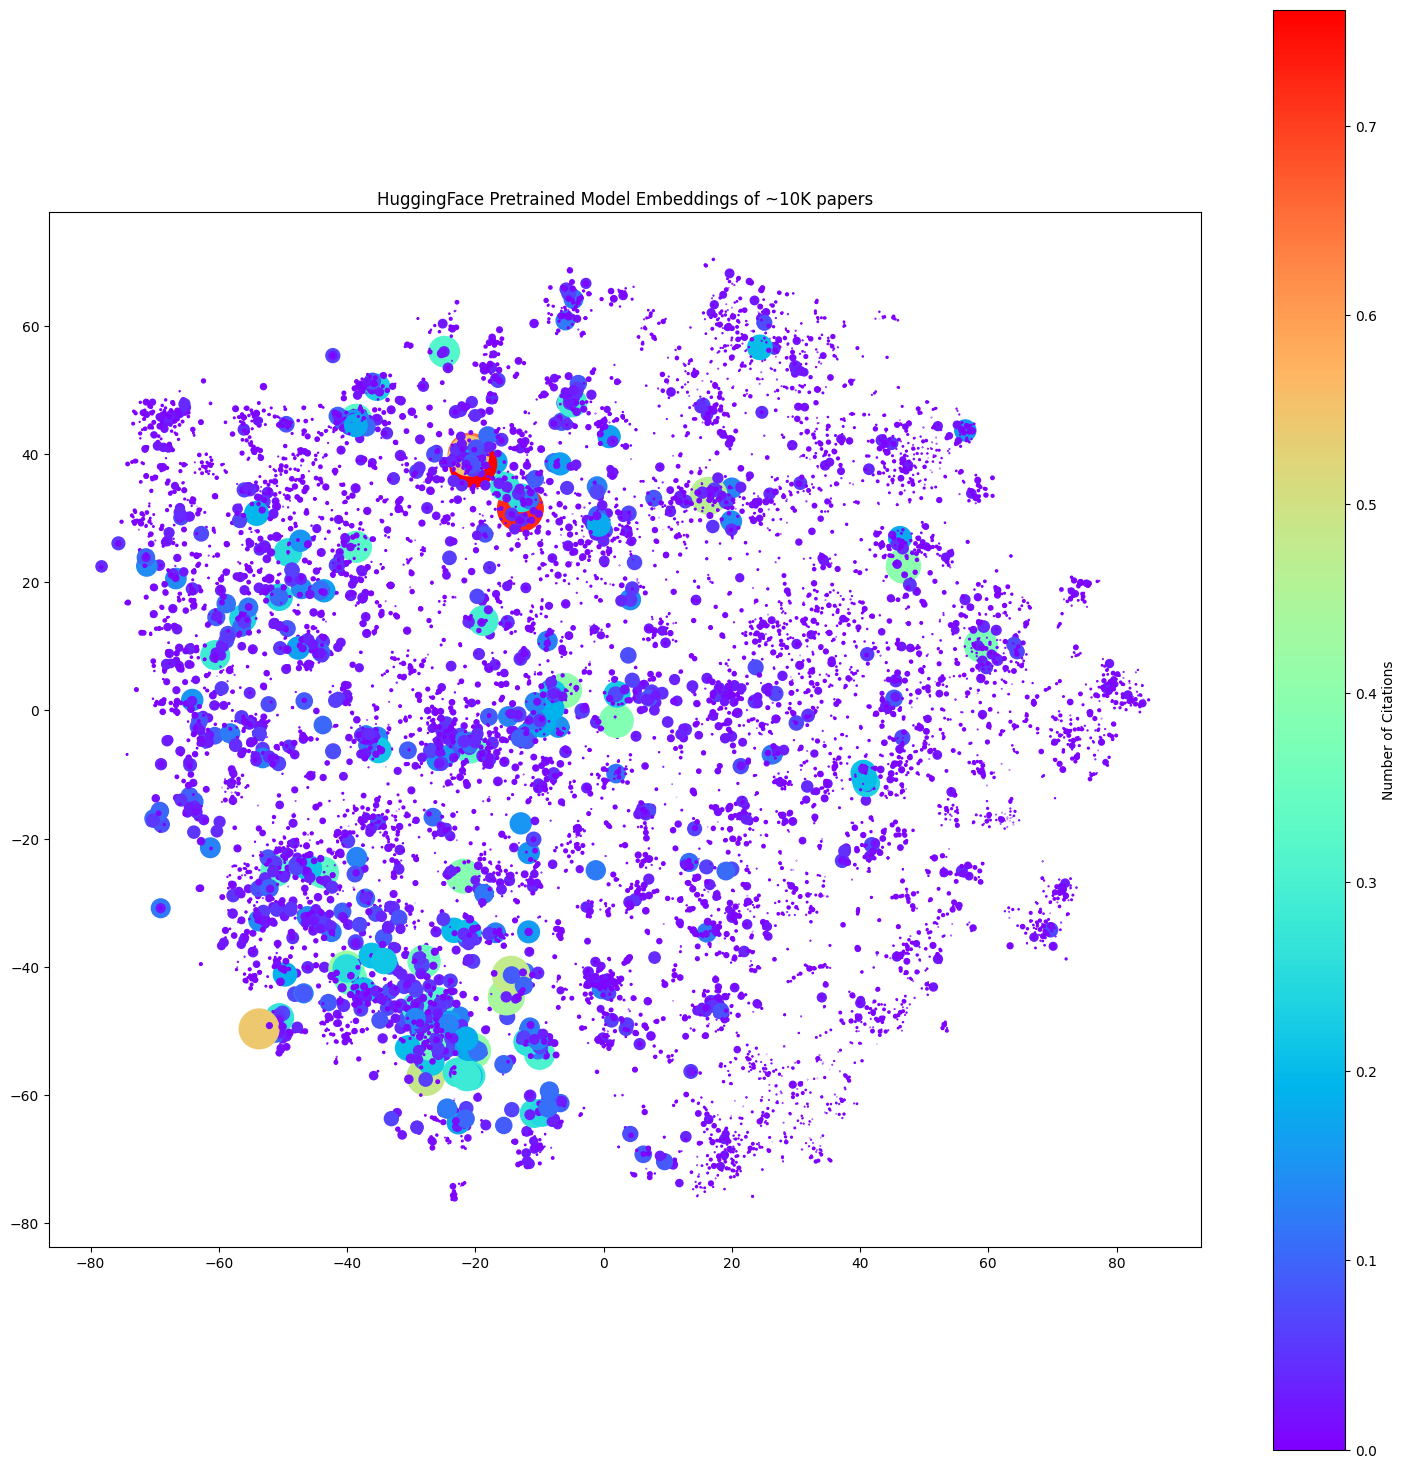

In [16]:
# Visualize the embeddings
fig = plt.figure(figsize=(16, 16))
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95)
ax = fig.add_subplot(111, aspect='equal')


sc = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=temp, cmap='rainbow', s=temp*1500)
plt.colorbar(sc, label='Number of Citations')
plt.title('HuggingFace Pretrained Model Embeddings of ~10K papers')
plt.show()

In [18]:
new_df = pd.DataFrame(embeddings_2d, columns=['x', 'y'])
new_df['size'] = temp * 15000
new_df['title'] = filtered_df['title']
new_df['citationCount'] = filtered_df['citationCount']
new_df['referenceCount'] = filtered_df['referenceCount']
new_df['year'] = filtered_df['year']

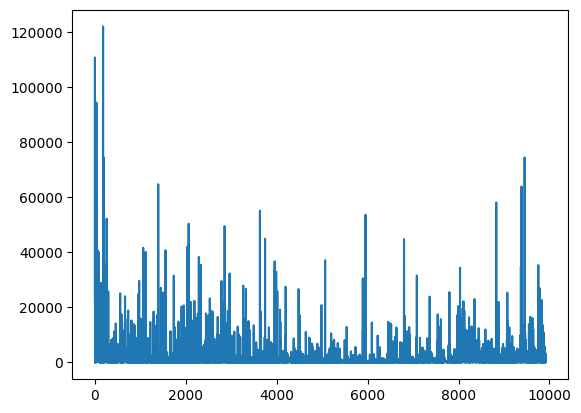

In [213]:
plt.plot(new_df['citationCount'])

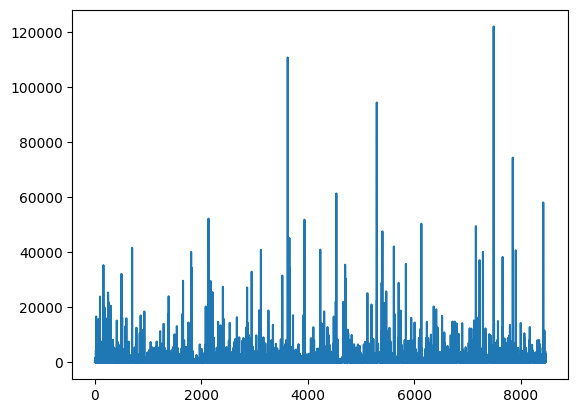

In [177]:
plt.plot(new_df['citationCount'])

In [19]:
new_df

,x,y,size,title,citationCount,referenceCount,year
0,46.236641,26.882277,2695.728579,Neural Machine Translation by Jointly Learning...,22147,32,2014
1,-12.969165,31.467712,10799.771995,Adam: A Method for Stochastic Optimization,110630,29,2014
2,57.639999,-33.925331,181.015086,SciBERT: A Pretrained Language Model for Scien...,1472,32,2019
3,-6.539848,45.015179,1515.851516,Explaining and Harnessing Adversarial Examples,12361,19,2014
4,30.667324,-59.772442,0.000000,The Semantic Scholar Open Data Platform,1,17,2023
...,...,...,...,...,...,...,...
9916,-62.775898,44.894543,60.423006,Automatically extracting highlights for TV Bas...,492,26,2000
9917,-53.646824,-40.865387,73.467293,On Realizability of a Set of Integers as Degre...,598,0,1962
9918,-52.111607,-49.163227,171.171501,Thermodynamic analysis of ion effects on the b...,1392,193,1978
9919,14.172874,-13.018872,79.251047,Efficiently updating materialized views,645,16,1986


In [21]:
import plotly.io as pio
import plotly.express as px
pio.renderers.default = 'browser'
fig = px.scatter(new_df, x='x', y='y', size='size', color='size', hover_data=['title', 'citationCount', 'referenceCount', 'year'], color_continuous_scale=px.colors.sequential.Rainbow, title='HF Pretrained Model')
pio.show(fig)

In [18]:
fig = px.scatter()

In [76]:
lisp = np.array([1,2,3,4,5,6,7,8,9,10])

In [142]:
lisp.shape

(10,)

In [170]:
lisp[np.random.permutation(lisp.shape[0])[:2]]

array([9, 7])

In [171]:
import torch

In [172]:
t = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12]])

In [176]:
t

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

In [187]:
x=torch.empty(1,3,1)
y=torch.empty(3,1,7)
(x.add_(y)).size()

torch.Size([3, 3, 7])